In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

In [ ]:
train = pd.read_csv('/content/sample_data/train_tweets.csv')
test = pd.read_csv('/content/sample_data/test_tweets.csv')

In [ ]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [ ]:
combined = train.append(test, ignore_index=True)
combined.shape

(49159, 3)

In [ ]:
np.unique(train.label, return_counts=True)

(array([0, 1]), array([29720,  2242]))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
train[train.label == 0].head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [ ]:
train[train.label == 1].head(10)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...

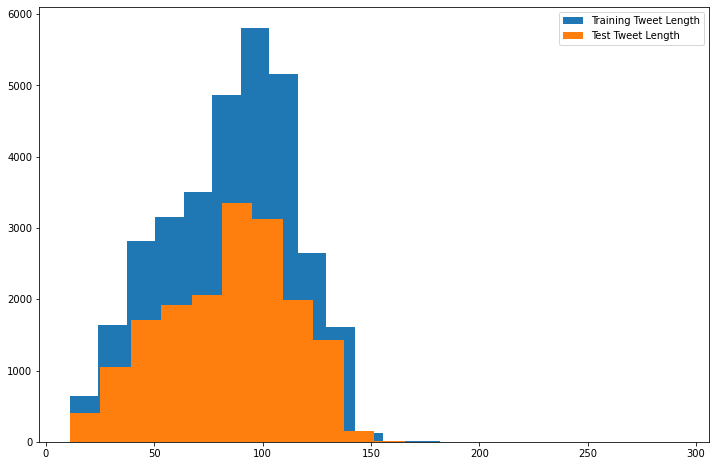

In [ ]:
length_train = train.tweet.str.len()
length_test = test.tweet.str.len()

plt.rcParams['figure.figsize'] = (12, 8)
plt.hist(length_train, bins=20, label='Training Tweet Length')
plt.hist(length_test, bins=20, label='Test Tweet Length')
plt.legend()
plt.show()

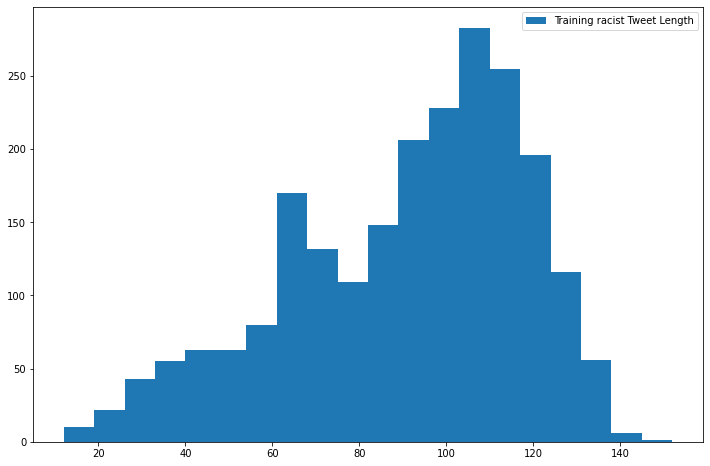

In [ ]:
racist_tweet = train[train.label == 1]
racist_length_train = racist_tweet.tweet.str.len()

plt.rcParams['figure.figsize'] = (12, 8)
plt.hist(racist_length_train, bins=20, label='Training racist Tweet Length')
plt.legend()
plt.show()

In [ ]:
combined.shape

(49159, 3)

### **Combine the training and testing dataset for PreProcessing steps**

In [ ]:
combined = train.append(test, ignore_index=True)
combined.shape

(49159, 3)

In [ ]:
def remove_pattern(input_text, pattern):
  r = re.findall(pattern, input_text)
  for i in r:
    input_text = re.sub(i, '', input_text)

  return input_text

In [ ]:
combined['tidy tweet'] = np.vectorize(remove_pattern)(combined['tweet'], '@[\w]*')

In [ ]:
combined.head()

id  ...                                         tidy tweet
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for #lyft credit i can't use cause th...
2   3  ...                                bihday your majesty
3   4  ...  #model   i love u take with u all the time in ...
4   5  ...             factsguide: society now    #motivation

[5 rows x 4 columns]

In [ ]:
combined['tidy tweet'] = combined['tidy tweet'].str.replace("[^a-zA-Z#]", " ")
combined.head()

id  ...                                         tidy tweet
0   1  ...    when a father is dysfunctional and is so sel...
1   2  ...    thanks for #lyft credit i can t use cause th...
2   3  ...                                bihday your majesty
3   4  ...  #model   i love u take with u all the time in ...
4   5  ...             factsguide  society now    #motivation

[5 rows x 4 columns]

In [ ]:
combined['tidy tweet'] = combined['tidy tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combined.head()

id  ...                                         tidy tweet
0   1  ...  when father dysfunctional selfish drags kids i...
1   2  ...  thanks #lyft credit cause they offer wheelchai...
2   3  ...                                bihday your majesty
3   4  ...                         #model love take with time
4   5  ...                     factsguide society #motivation

[5 rows x 4 columns]

In [ ]:
combined.isna().sum()

id                0
label         17197
tweet             0
tidy tweet        0
dtype: int64

In [ ]:
tokenized_tweet = combined['tidy tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy tweet, dtype: object

In [ ]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

In [ ]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combined['tidy tweet'] = tokenized_tweet

In [ ]:
combined.shape

(49159, 4)

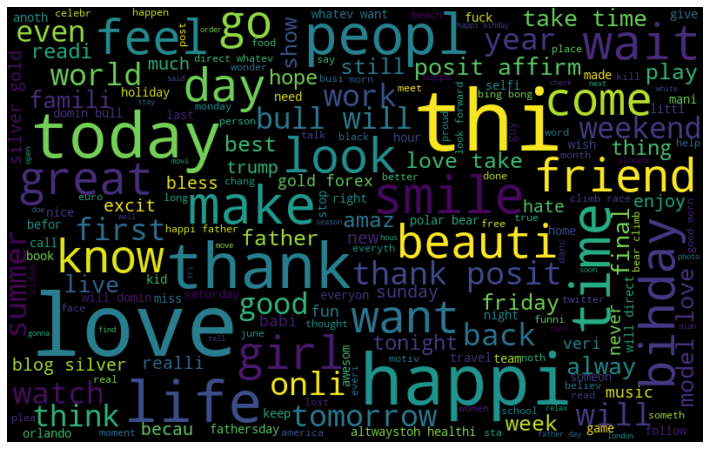

In [ ]:
all_words = ' '.join([text for text in combined['tidy tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(all_words)
plt.rcParams['figure.figsize'] = (14, 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### ***Mostly the frquent words are Neutral in Nature, So rather draw the racist/ sexist tweets***

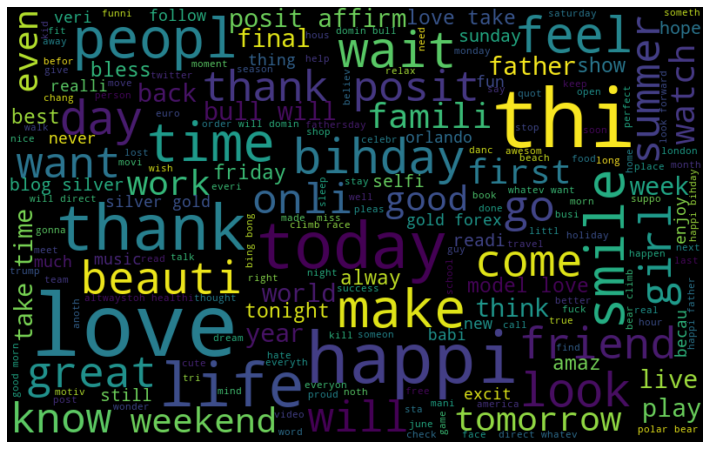

In [ ]:
normal_words = ' '.join([text for text in combined['tidy tweet'][combined['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(normal_words)
plt.rcParams['figure.figsize'] = (14, 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_words = ' '.join([text for text in combined['tidy tweet'][combined['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100).generate(negative_words)
plt.rcParams['figure.figsize'] = (14, 8)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Function to collect HashTags
def hashtag_extractor(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)

  return hashtags

In [ ]:
HT_regular = hashtag_extractor(combined['tidy tweet'][combined.label == 0])
HT_negatives = hashtag_extractor(combined['tidy tweet'][combined.label == 1])

In [ ]:
HT_regular = sum(HT_regular, [])
HT_negatives = sum(HT_negatives, [])

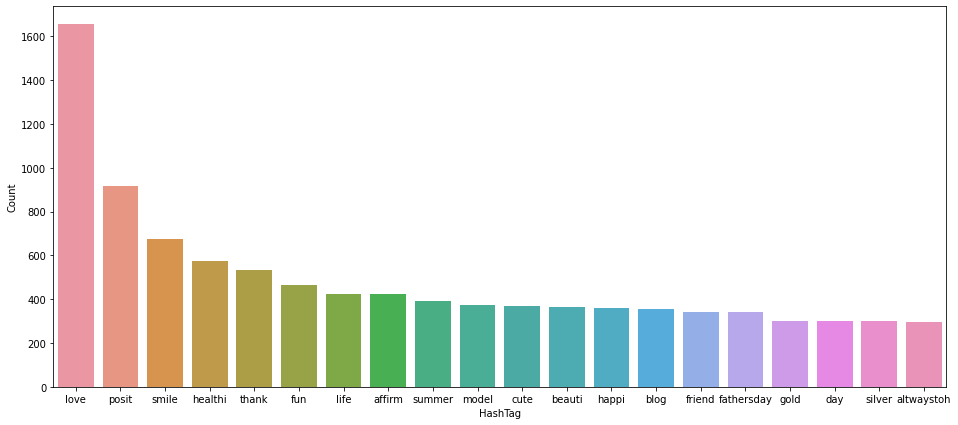

In [ ]:
a = nltk.FreqDist(HT_regular)

d = pd.DataFrame({"HashTag": list(a.keys()), "Count": list(a.values())})
# Selecting top 20 most frequent words

d = d.nlargest(columns='Count', n=20)
plt.rcParams['figure.figsize'] = (16, 7)
ax = sns.barplot(data=d, x='HashTag', y='Count')
ax.set(ylabel='Count')
plt.show()

In [ ]:
b = nltk.FreqDist(HT_negatives)

e = pd.DataFrame({"HashTag": list(b.keys()), "Count": list(b.values())})
# Selecting top 20 most frequent words

e = e.nlargest(columns='Count', n=20)
plt.rcParams['figure.figsize'] = (16, 7)
ax = sns.barplot(data=e, x='HashTag', y='Count')
ax.set(ylabel='Count')
plt.show()

In [ ]:
combined.shape

(49159, 4)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined['tidy tweet'])
bow.shape

(49159, 1000)

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
tfidf = tf_idf_vectorizer.fit_transform(combined['tidy tweet'])
tfidf.shape

(49159, 1000)

In [ ]:
e.head()

HashTag  Count
22      trump    136
31      polit     95
63  allahsoil     92
30      liber     81
28    libtard     77

In [ ]:
tokenize_text = combined['tidy tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(tokenize_text, size=200, window=5, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)

In [ ]:
model_w2v.train(tokenize_text, total_examples=len(combined['tidy tweet']), epochs=20)

(6510231, 7536020)

In [ ]:
def word_vector(tokens, size):
  vec = np.zeros(size).reshape((1, size))
  count=0
  for word in tokens:
    try:
      vec += model_w2v[word].reshape((1, size))
      count += 1
    except KeyError:
      continue

  if count != 0:
    vec /= count

  return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenize_text), 200))
for i in range(len(tokenize_text)):
  wordvec_arrays[i,:] = word_vector(tokenize_text[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays)

wordvec_df.shape

(49159, 200)

In [ ]:
combined.shape

(49159, 4)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [ ]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

xtrain_bow, xvalid_bow, ytrain_bow, yvalid_bow = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [ ]:
yvalid_bow.shape

(9589,)

In [ ]:
lrg = LogisticRegression()

In [ ]:
lrg.fit(xtrain_bow, ytrain_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = lrg.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [ ]:
f1_score(yvalid_bow, prediction_int)

0.5303408146300915

In [ ]:
test_pred = lrg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

In [ ]:
submission = test[['id', 'label']]
submission.to_csv('sub_lrg_bow.csv', index=False)

**SVM Implementation**

In [ ]:
from sklearn import svm

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

In [ ]:
svc = svm.SVC(kernel='linear', C=10, probability=True)
svc.fit(xtrain_tfidf, ytrain_tfidf)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [ ]:
f1_score(yvalid_tfidf, prediction_int)

0.5130044843049327

In [ ]:
test_pred = svc.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

In [ ]:
wordvec_df.shape

(49159, 200)

In [ ]:
train_wordvec = wordvec_df.iloc[:31962,:]
test_wordvec = wordvec_df.iloc[31962:,:]

xtrain_wordvec, xvalid_wordvec, ytrain_wordvec, yvalid_wordvec = train_test_split(train_wordvec,
                                                                                  train['label'], 
                                                                                  random_state=42, 
                                                                                  test_size=0.3)

In [ ]:
svc.fit(xtrain_wordvec, ytrain_wordvec)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
prediction = svc.predict_proba(xvalid_wordvec)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [ ]:
f1_score(yvalid_wordvec, prediction_int)

0.6042154566744731

In [ ]:
test_pred = svc.predict_proba(test_wordvec)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

In [ ]:
submission = test[['id', 'label']]
submission.to_csv('sub_svm_w2v.csv', index=False)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)

In [ ]:
rf.fit(xtrain_wordvec, ytrain_wordvec)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
prediction = rf.predict(xvalid_wordvec)

In [ ]:
f1_score(yvalid_wordvec, prediction)

0.5112781954887218

In [ ]:
test_pred = rf.predict_proba(test_wordvec)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

In [ ]:
submission = test[['id', 'label']]
submission.to_csv('sub_rf_w2v.csv', index=False)

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=400)

In [ ]:
xgb.fit(xtrain_tfidf, ytrain_tfidf)
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid_tfidf, prediction)

0.5005005005005004

In [ ]:
xgb.fit(xtrain_wordvec, ytrain_wordvec)
prediction = xgb.predict(xvalid_wordvec)
f1_score(yvalid_wordvec, prediction)

0.6648648648648648

In [ ]:
test_pred = xgb.predict_proba(test_wordvec)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

In [ ]:
submission = test[['id', 'label']]
submission.to_csv('sub_xgb_w2v.csv', index=False)

**LSTM**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.activations import relu, sigmoid, softmax